In [2]:
from BatSim.Physical import Unconditional, Daemonic  
import matplotlib.pyplot as plt
import numpy as np
font = {'family': 'serif',
        'weight': 'normal',
        'size': 13,
        }

c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [3]:
Steps = 10  # Number of steps for the collisional model
alpha = 1  # drving field parameter for the physical Hamiltonian model
kappa = 2  # coupling parameter for the physical Hamiltonian model
omega = alpha

X is selected
Y is selected 
Z is selected


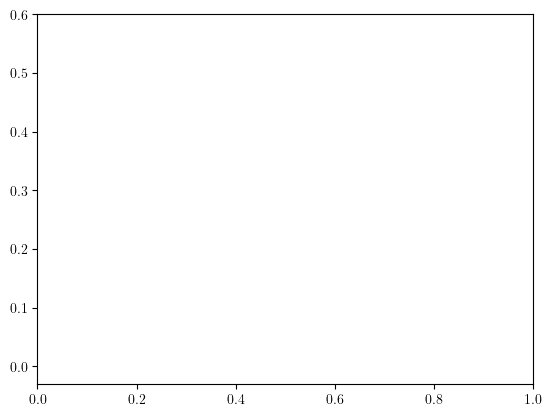

In [10]:
m = ["X", "Y", "Z"]
P01, P10, pa, pd = 0.01, 0.01, 0.1 ,0.1

plt.rcParams['font.family'] = "serif"
plt.rcParams['text.usetex'] = True

plt.ylim(-0.03, 0.6)
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Assuming x_axis is defined elsewhere


results = []

for item in m:
    Passive_Theory = Daemonic.Theory(Steps=Steps,omega = omega, kappa = kappa, pa=pa, pd=pd, P01=P01, P10=P10, m =item)
    ##Passive_Theory = Daemonic.Theory(Steps=Steps,Charge= Charge, pa=pa, pd=pd, P01=P01, P10=P10)

    # Calculate theoretical results using the Unconditional module for passive energy and ergCXotropy
    Energy_Theory, Ergotropy_Theory = Unconditional.Theory(Steps=Steps, omega = omega, kappa = kappa, pa=pa, pd=pd, m = item)
    #Energy_Theory, Ergotropy_Theory = Unconditional.Theory(Steps=Steps, Charge= Charge, pa=pa, pd=pd)


    # Calculate the theoretical and implemented Daemonic results.
    Daemonic_Theory = [xi - yi for xi, yi in zip(Energy_Theory, Passive_Theory)]

    results.append(Daemonic_Theory)


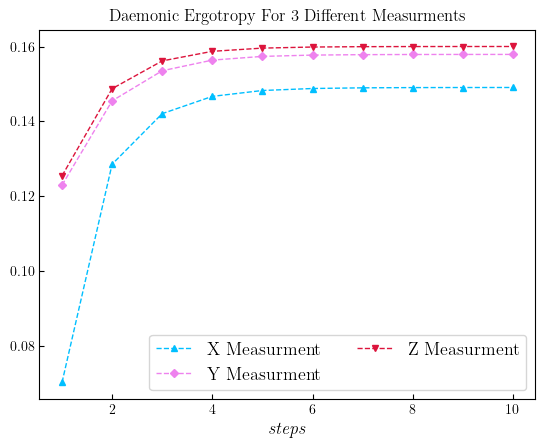

In [11]:

plt.plot(x_axis, results[0], color='deepskyblue', linestyle='dashed', linewidth=1,
            marker='^', markerfacecolor='deepskyblue', markersize=4, label= "X Measurment",  zorder=1)
        
#plt.plot(x_axis, Ergotropy_Im, color='blue', linestyle='dashed', linewidth=1,
            #marker='s', markerfacecolor='blue', markersize=4, label="Unconditional Work - Implementation")
plt.plot(x_axis, results[1], color='violet', linestyle='dashed', linewidth=1,
            marker="D", markerfacecolor='violet', markersize=4, label= "Y Measurment",  zorder=2)

plt.plot(x_axis, results[2], color='crimson', linestyle='dashed', linewidth=1,
            marker="v", markerfacecolor='crimson', markersize=4, label= "Z Measurment",  zorder=3)
import os


plt.xlabel(r'\em steps', fontdict=font)
# plt.ylabel('Energy', fontdict=font, fontsize=12)
#plt.title('Daemonic and Unconditional Work Extraction ', fontdict=font, fontsize=12)
plt.tick_params(direction='in', which='both')
plt.tick_params(which='minor', length=4, color='r')
plt.title("Daemonic Ergotropy For 3 Different Measurments")
# Adjust legend position to the right of the plot
ax = plt.subplot(111)
ax.legend(prop=font, ncol=2)

directory = "Plots"  # Use raw string to handle backslashes in Windows paths
filename = f'{"Compare Measurment"}.pdf'
filepath = os.path.join(directory, filename)

# Save and display the plot
plt.savefig(filepath, format="pdf", dpi=600, bbox_inches='tight')
plt.show()